# Restaurant Revenue Prediction

This notebook has the objective to try this kaggle competion, to predict restaurant revenue:
    
https://www.kaggle.com/c/restaurant-revenue-prediction/data

In [130]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

#Reading the csv dataset for training
train = pd.read_csv("C:\\Users\\Paulo.Santos\\Desktop\\Pessoal\\Data Science Projects\\data-science-projects\\kaggle\\restaurant-revenue-prediction\\train.csv")
test = pd.read_csv("C:\\Users\\Paulo.Santos\\Desktop\\Pessoal\\Data Science Projects\\data-science-projects\\kaggle\\restaurant-revenue-prediction\\test.csv")

In [21]:
#Checking the info about the features.
#There are 1 id column, 1 date column, 1 text, and 2 categorical features.
#all the other features are numerical
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
Id            137 non-null int64
Open Date     137 non-null object
City          137 non-null object
City Group    137 non-null object
Type          137 non-null object
P1            137 non-null int64
P2            137 non-null float64
P3            137 non-null float64
P4            137 non-null float64
P5            137 non-null int64
P6            137 non-null int64
P7            137 non-null int64
P8            137 non-null int64
P9            137 non-null int64
P10           137 non-null int64
P11           137 non-null int64
P12           137 non-null int64
P13           137 non-null float64
P14           137 non-null int64
P15           137 non-null int64
P16           137 non-null int64
P17           137 non-null int64
P18           137 non-null int64
P19           137 non-null int64
P20           137 non-null int64
P21           137 non-null int64
P22           137 non-nul

In [22]:
#Checking the values count of categorical feature City Group
pd.DataFrame(train["City Group"].value_counts())

,City Group
Big Cities,78
Other,59


In [23]:
#Checking the values count of categorical feature Type of Restaurant
pd.DataFrame(train["Type"].value_counts())

,Type
FC,76
IL,60
DT,1


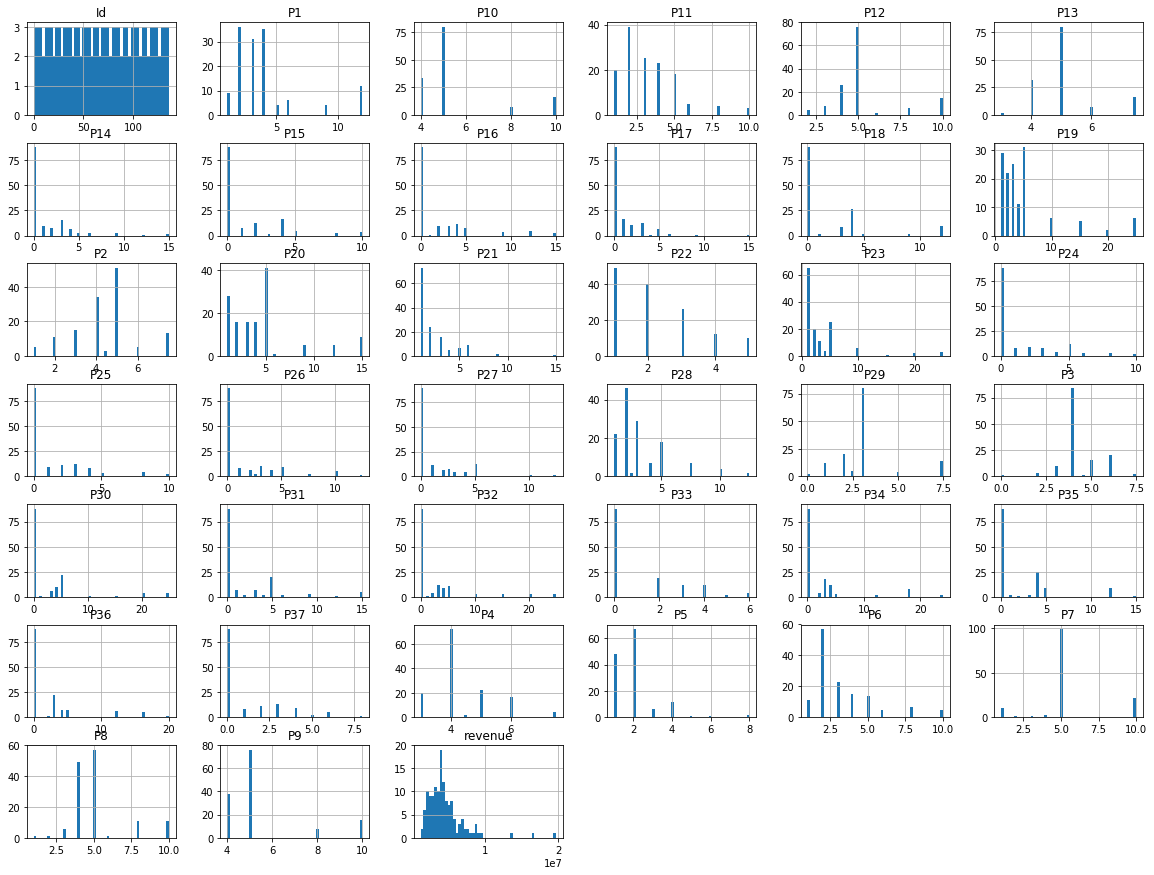

In [24]:
%matplotlib inline
train.hist(bins=50, figsize=(20,15))
plt.show()

In [72]:
#Removing the id, Open Date and City columns, so we can see the correlation matrix correctly
train_without_text = train.drop(["Id","Open Date", "City"],axis=1)
#corr_matrix = train_without_id.corr()
train_only_nums = train_without_text.drop(["City Group", "Type", "revenue"], axis=1)
train_cat = train[["City Group", "Type"]].copy()
train_cat
#corr_matrix

,City Group,Type
0,Big Cities,IL
1,Big Cities,FC
2,Other,IL
3,Other,IL
4,Other,IL
...,...,...
132,Other,FC
133,Big Cities,FC
134,Other,FC
135,Big Cities,FC


In [64]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [69]:
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

train_nums_tr = num_pipeline.fit_transform(train_only_nums)


C:\Users\Paulo.Santos\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Paulo.Santos\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [127]:
#city_group

ohe_city_group = OneHotEncoder(categories='auto')
feature_arr = ohe_city_group.fit_transform(train_without_text[['City Group']]).toarray()
feature_labels = ohe_city_group.categories_


feature_labels = np.array(feature_labels).ravel()
print(feature_labels)

features_city_group = pd.DataFrame(feature_arr, columns=feature_labels)
features_city_group

['Big Cities' 'Other']


,Big Cities,Other
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
132,0.0,1.0
133,1.0,0.0
134,0.0,1.0
135,1.0,0.0


In [88]:
#type

ohe_type = OneHotEncoder(categories='auto')
feature_arr = ohe_type.fit_transform(train_without_text[['Type']]).toarray()
feature_labels = ohe_type.categories_

feature_labels = np.array(feature_labels).ravel()
print(feature_labels)

features_type = pd.DataFrame(feature_arr, columns=feature_labels)
features_type

['DT' 'FC' 'IL']


,DT,FC,IL
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
132,0.0,1.0,0.0
133,0.0,1.0,0.0
134,0.0,1.0,0.0
135,0.0,1.0,0.0


In [98]:
#Prepared dataset
x = train_only_nums
x[features_city_group.columns] = features_city_group
x[features_type.columns] = features_type
x["revenue"] = train["revenue"]
x 

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P34,P35,P36,P37,Big Cities,Other,DT,FC,IL,revenue
0,4,5.0,4.0,4.0,2,2,5,4,5,5,...,5,4,3,4,1.0,0.0,0.0,0.0,1.0,5653753.0
1,4,5.0,4.0,4.0,1,2,5,5,5,5,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,6923131.0
2,2,4.0,2.0,5.0,2,3,5,5,5,5,...,0,0,0,0,0.0,1.0,0.0,0.0,1.0,2055379.0
3,6,4.5,6.0,6.0,4,4,10,8,10,10,...,18,12,12,6,0.0,1.0,0.0,0.0,1.0,2675511.0
4,3,4.0,3.0,4.0,2,2,5,5,5,5,...,3,4,3,3,0.0,1.0,0.0,0.0,1.0,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,2,3.0,3.0,5.0,4,2,4,4,4,4,...,0,0,0,0,0.0,1.0,0.0,1.0,0.0,5787594.0
133,4,5.0,4.0,4.0,2,3,5,4,4,5,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,9262754.0
134,3,4.0,4.0,4.0,2,3,5,5,5,5,...,0,0,0,0,0.0,1.0,0.0,1.0,0.0,2544857.0
135,4,5.0,4.0,5.0,2,2,5,5,5,5,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,7217634.0


In [119]:
corr_matrix = x.corr()


In [115]:
corr_revenue = pd.DataFrame(corr_matrix["revenue"].sort_values(ascending=False))
best_features = corr_revenue.head(10)
best_features

,revenue
revenue,1.000000
Big Cities,0.237403
P2,0.191518
P28,0.155534
P6,0.139094
FC,0.100211
P21,0.097411
P11,0.084247
P22,0.083562
P1,0.070217


In [141]:
y = x
y

x_train = x.drop("revenue", axis=1)
x_train

y_train = x["revenue"]
y_train

0      5653753.0
1      6923131.0
2      2055379.0
3      2675511.0
4      4316715.0
         ...    
132    5787594.0
133    9262754.0
134    2544857.0
135    7217634.0
136    6363241.0
Name: revenue, Length: 137, dtype: float64

In [145]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train) 

train_predict = lin_reg.predict(x_train)

lin_mse = mean_squared_error(y_train, train_predict)
lin_rmse = np.sqrt(lin_mse)
lin_rmse 

2143081.0245204517

In [147]:
#Creating a grid of parameters of GridSearch
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = [    
    {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3,10], 
    'max_features': [2,3,4]},
]

forest_reg = RandomForestRegressor()

#Setting up the Grid Search with Random Forest Regressor
grid_search = GridSearchCV(forest_reg, param_grid,
                           cv=5, scoring="neg_mean_squared_error",
                           return_train_score=True)

# Grid Search will check all possible combinations between the param grid
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [132]:
test_without_text = test.drop(["Id","Open Date", "City"],axis=1)
#corr_matrix = train_without_id.corr()
test_only_nums = test_without_text.drop(["City Group", "Type"], axis=1)
test_cat = train[["City Group", "Type"]].copy()

test_nums_tr = num_pipeline.fit_transform(test_only_nums)

C:\Users\Paulo.Santos\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Paulo.Santos\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000196B093ABE0>,
        ...,
        ...,
        ...,
       ...,
        ...,
        ...,
        ...,
      dtype=object)

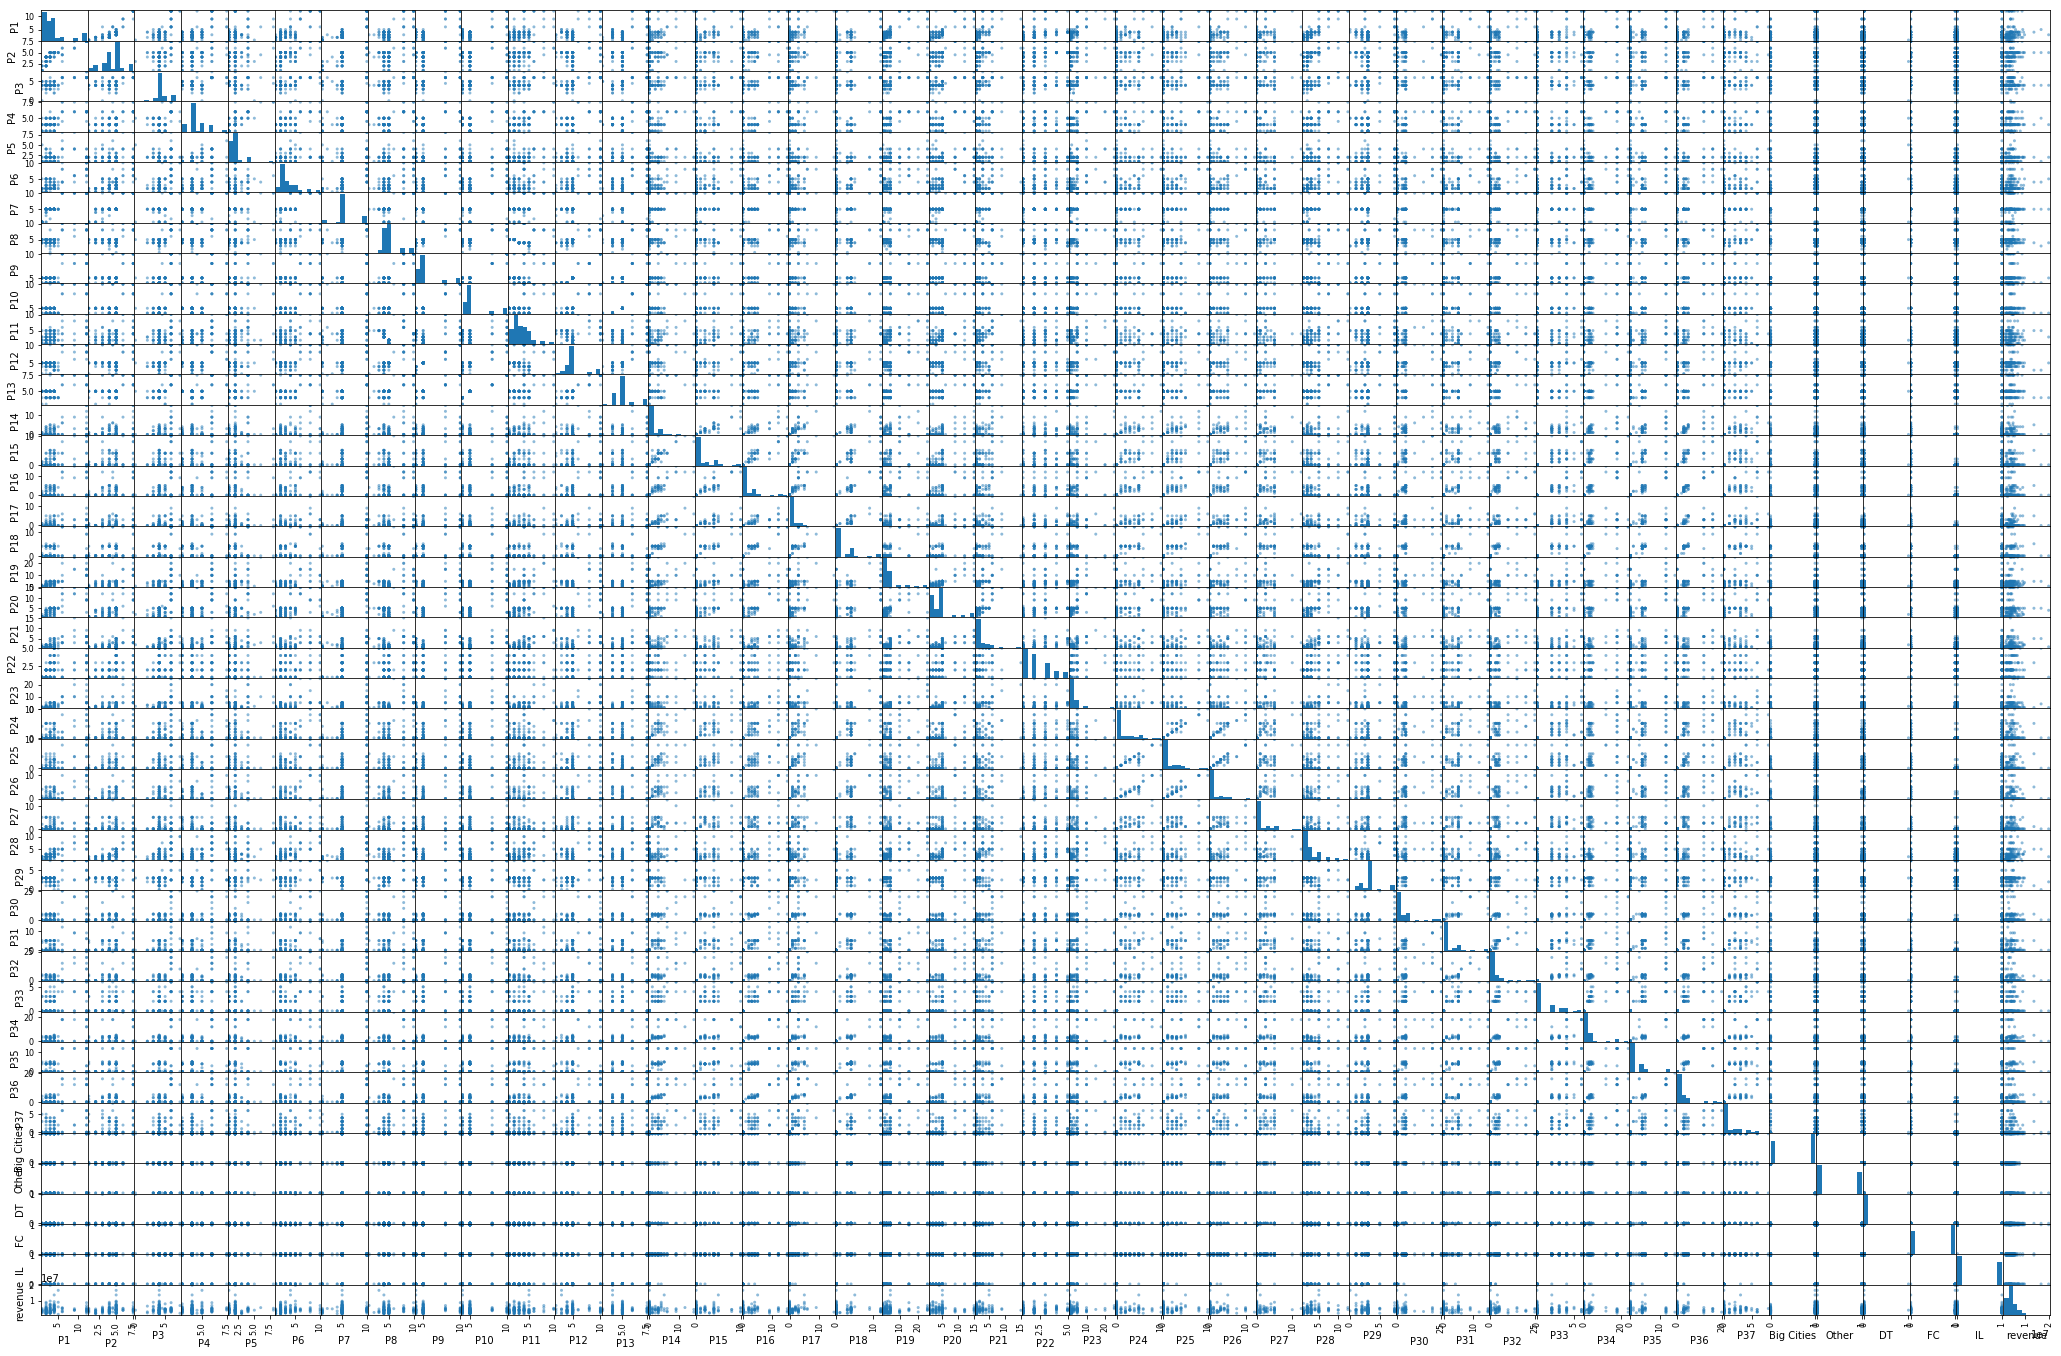

In [123]:
#scatter_matrix(x[["revenue","Big Cities", "P2", "P28", "P6", "FC", "P21", "P11", "P22", "P1"]], figsize=(36,24))
scatter_matrix(x, figsize=(36,24))

In [ ]:
train_without_id = train.drop("Id",axis=1)
corr_matrix = train_without_id.corr()
corr_matrix

In [61]:
corr_revenue = pd.DataFrame(corr_matrix["revenue"].sort_values(ascending=False))
corr_revenue

,revenue
revenue,1.000000
P2,0.191518
P28,0.155534
P6,0.139094
P21,0.097411
P11,0.084247
P22,0.083562
P1,0.070217
P17,0.067137
P7,0.051165


In [28]:
best_corr_revenue = corr_revenue[(corr_revenue["revenue"]>0.05) | (corr_revenue["revenue"]< -0.06)]

pd.DataFrame(best_corr_revenue)
best_features = best_corr_revenue.index.values
best_features

array(['revenue', 'P2', 'P28', 'P6', 'P21', 'P11', 'P22', 'P1', 'P17',
       'P7', 'P12', 'P32', 'P30', 'P34', 'P10', 'P8', 'P13', 'P29'],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000196956A0470>,
      dtype=object)

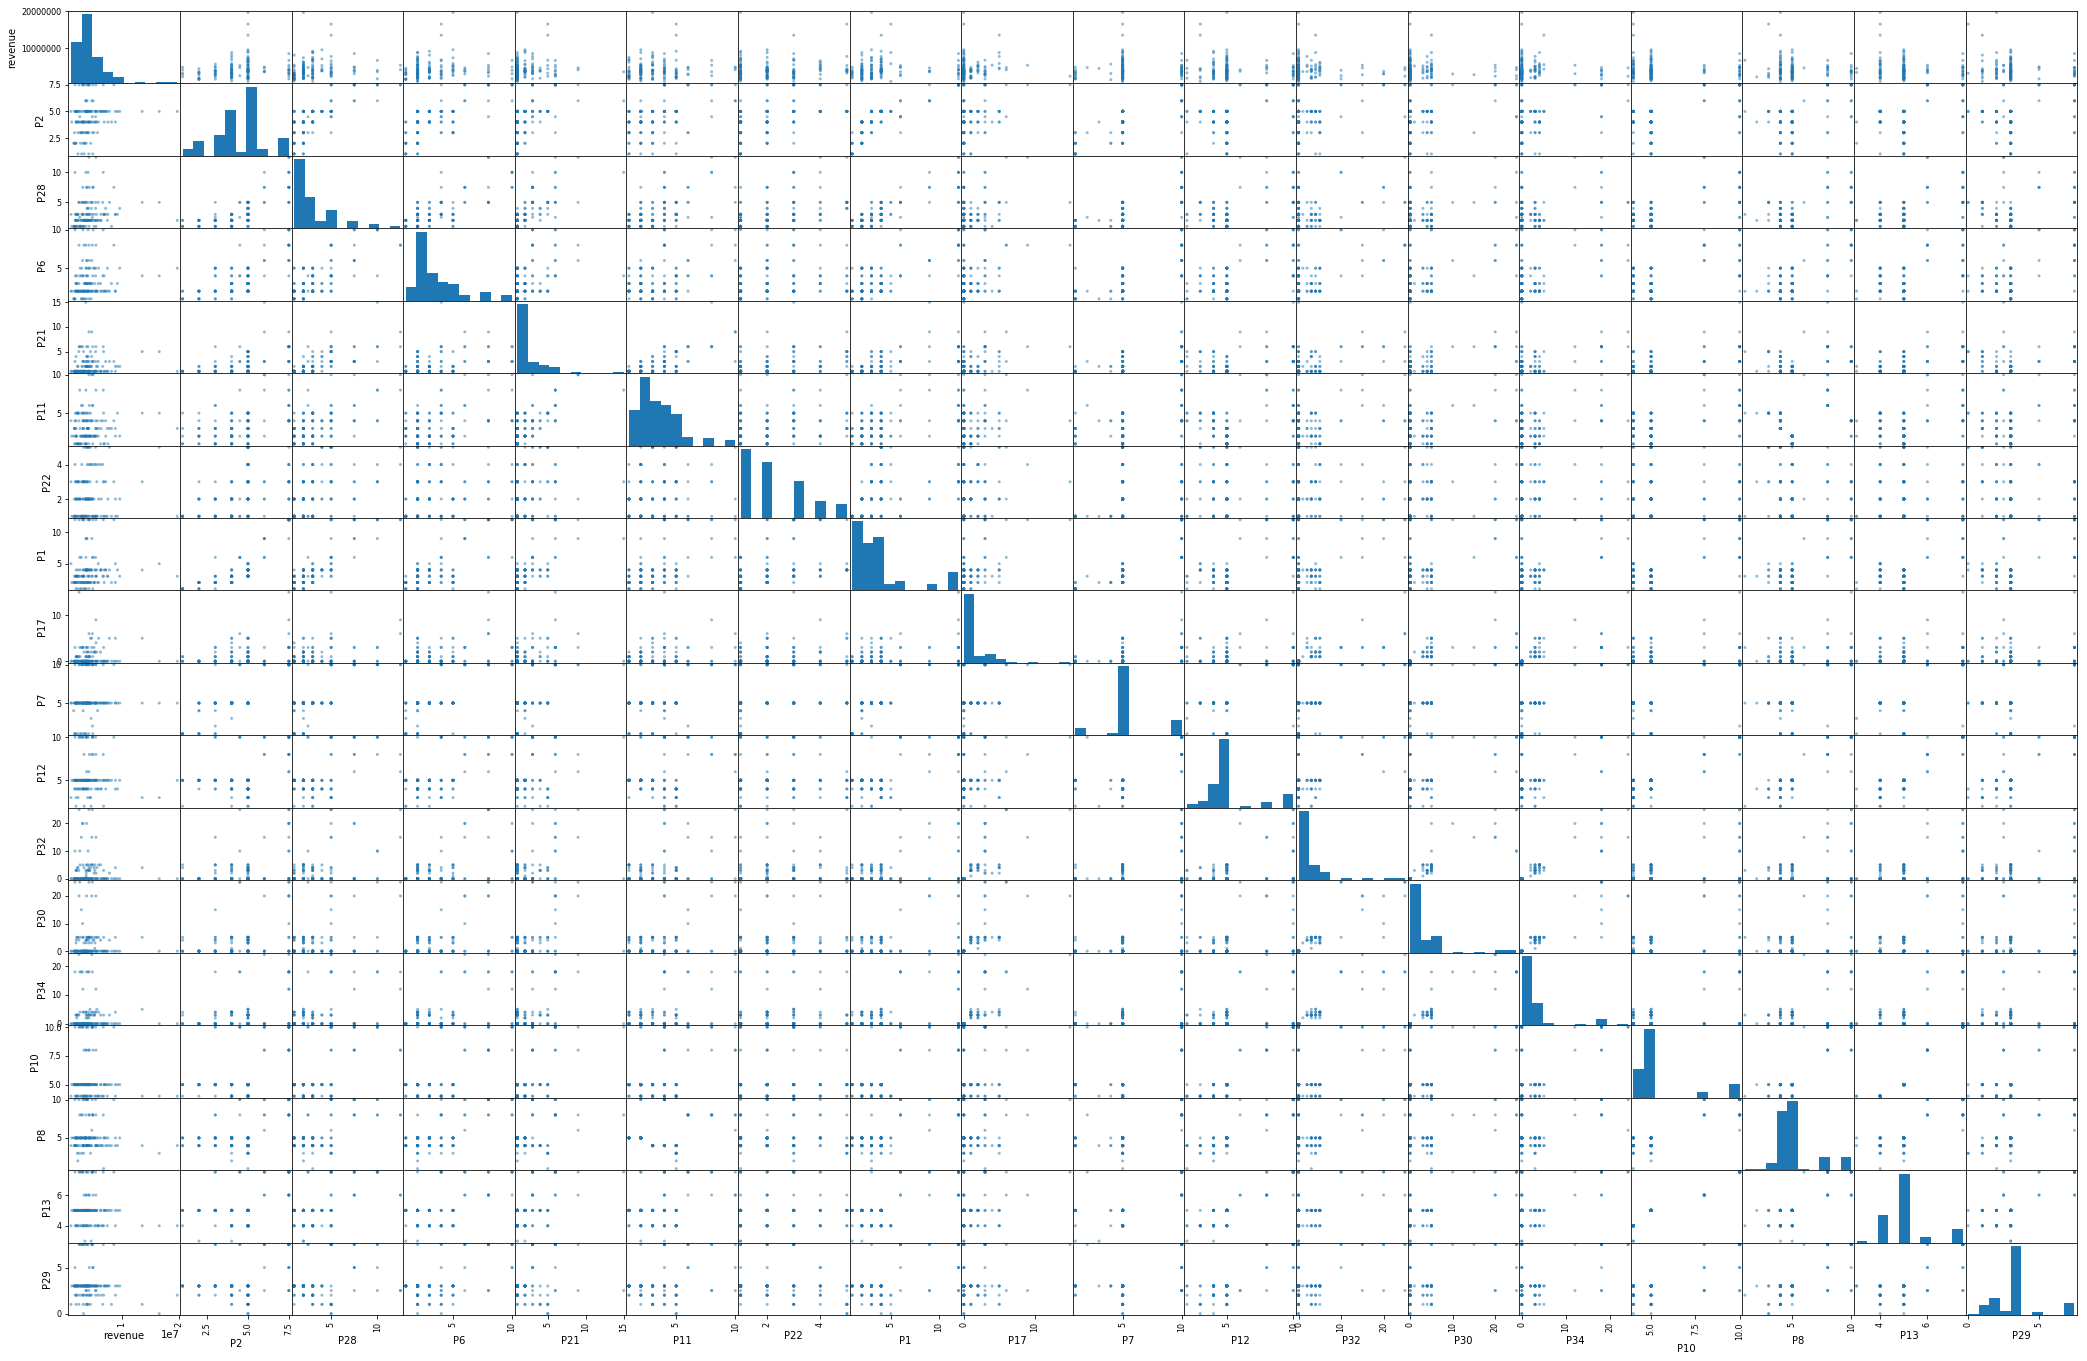

In [29]:
from pandas.plotting import scatter_matrix
from scipy import stats

scatter_matrix(train[best_features], figsize=(36,24))